# 漫威宇宙 第四階段以前  VS 第四階段以後 情緒分析

In [1]:
from datetime import datetime
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud 
import jieba
import numpy as np
import seaborn as sns

%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
fprop = fm.FontProperties(fname="./SourceHanSansTW-Regular.otf")
fprop


# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

## 1. 資料前處理

資料來源: tarflow 平台 PTT 2008-至今 含有有關漫威關鍵字的文章以及評論

In [2]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

131072

In [3]:
df_2008 = pd.read_csv('./data/2008_marvel.csv')
df_2017 = pd.read_csv('./data/2017_marvel.csv')

In [4]:
df = pd.concat([df_2008, df_2017], ignore_index=True)
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/movie/M.1203700706.A.0B...,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,totoroJack,movie,原文與劇照請參照:\nhttp://totorogo.dyndns.org/?p=425\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",None,2018-04-27 17:01:04,ptt
1,2,https://www.ptt.cc/bbs/movie/M.1209570769.A.74...,[好雷]鋼鐵人(IronMan),2008-04-30 15:46:48,Falcone,movie,Marvel首次製作的作品，可說繳出一張優秀的成績單。\n\n先講不滿的地方，就是前半的精彩...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""a558815"", ""c...",None,2018-04-27 17:01:33,ptt
2,3,https://www.ptt.cc/bbs/movie/M.1209836216.A.8D...,Re:[請益]鋼鐵人和移動世界有關係嗎?片尾,2008-05-03 17:30:53,masayo,movie,我也來補充一下好了\n以下是寫給對美漫完全沒有概念的人看的 而且主題重點放在電影方面\n\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""c5170439"", ""...",None,2018-04-27 17:01:33,ptt
3,4,https://www.ptt.cc/bbs/movie/M.1210080500.A.5D...,[好雷]《鋼鐵人》by（時光之硯）,2008-05-06 13:22:10,NEKObus,movie,《鋼鐵人》- 時光之硯部落格\nPTT2個人板\nInkstone\nhttp://blog...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Zarathustra8...",None,2018-04-27 17:01:33,ptt
4,5,https://www.ptt.cc/bbs/movie/M.1210388646.A.DC...,「鋼鐵人」小勞勃道尼(RobertDowneyJr.)的浮沉人生,2008-05-10 02:58:03,leila,movie,圖文版：\nhttp://www.wretch.cc/blog/wildflower/963...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Lovetech"", ""...",None,2018-04-27 17:01:33,ptt
...,...,...,...,...,...,...,...,...,...,...,...
11471,8702,https://www.ptt.cc/bbs/movie/M.1672313701.A.44...,[雷][普好雷]水之道：星球大戰之納美人魚歷險,2022-12-29 19:34:59,moswu,movie,雷文防雷資訊頁\n \n \n \n~*-*~*-*~*-*~*-*~*-*~*-*~*-*...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""yushenglu"", ...",220.137.166.118,2022-12-30 02:00:14,ptt
11472,8703,https://www.ptt.cc/bbs/movie/M.1672328134.A.98...,[新聞]《阿凡達》三部續集片名意外曝光導演透露《阿凡達4》是最精彩的一部！,2022-12-29 23:35:31,kenny1300175,movie,新聞網址：\nhttps://tinyurl.com/3h7u8y5m\n《阿凡達》三部續集...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""jidytri815"",...",118.166.158.32,2022-12-30 02:00:15,ptt
11473,8704,https://www.ptt.cc/bbs/movie/M.1672362211.A.E7...,Re:[請益]漫威電影是不是從多重宇宙爛掉,2022-12-30 09:03:29,IBIZA,movie,"這說法就不對\n\n在復仇者4我們就可以看到, 他們在進行時空攔截之後, 創造了有著不同歷史...","[{""cmtStatus"": ""推"", ""cmtPoster"": ""shingatter"",...",1.169.125.162,2022-12-31 01:55:58,ptt
11474,8705,https://www.ptt.cc/bbs/movie/M.1672371199.A.68...,[新聞]〈年度回顧〉2022超級英雄電影排名,2022-12-30 11:33:16,kenny1300175,movie,新聞網址：\nhttps://tinyurl.com/yckv3sua\n2022-12-2...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""kawazakiz2"",...",118.166.158.32,2022-12-31 01:55:58,ptt


## 移除不需要的column

In [5]:
df= df.drop(['system_id', 'artUrl', 'artPoster', 'artCatagory', 'e_ip', 'dataSource'],axis =1)
df.head()

,artTitle,artDate,artContent,artComment,insertedDate
0,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,原文與劇照請參照:\nhttp://totorogo.dyndns.org/?p=425\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04
1,[好雷]鋼鐵人(IronMan),2008-04-30 15:46:48,Marvel首次製作的作品，可說繳出一張優秀的成績單。\n\n先講不滿的地方，就是前半的精彩...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""a558815"", ""c...",2018-04-27 17:01:33
2,Re:[請益]鋼鐵人和移動世界有關係嗎?片尾,2008-05-03 17:30:53,我也來補充一下好了\n以下是寫給對美漫完全沒有概念的人看的 而且主題重點放在電影方面\n\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""c5170439"", ""...",2018-04-27 17:01:33
3,[好雷]《鋼鐵人》by（時光之硯）,2008-05-06 13:22:10,《鋼鐵人》- 時光之硯部落格\nPTT2個人板\nInkstone\nhttp://blog...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Zarathustra8...",2018-04-27 17:01:33
4,「鋼鐵人」小勞勃道尼(RobertDowneyJr.)的浮沉人生,2008-05-10 02:58:03,圖文版：\nhttp://www.wretch.cc/blog/wildflower/963...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Lovetech"", ""...",2018-04-27 17:01:33


In [6]:
clear_df = df.copy()

#該column 名稱
clear_df = clear_df.rename(columns = {'artContent':'sentence'})

# 去除有包含空值的筆數
clear_df.dropna(axis=0, how="any", inplace=True)

# 用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace("\\n\\n", "。", regex=True).replace("\n", "", regex=True)

# 移除內文中的網址
clear_df[""] = (
    clear_df["sentence"]
    .replace(r"http\S+", "", regex=True)
    .replace(r"www\S+", "", regex=True)
    .replace(r"\d+", "", regex=True)
)

In [7]:
clear_df["sentence"] = clear_df["sentence"].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode("sentence").reset_index(drop=True)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

## 初步的斷詞

In [8]:
jieba.set_dictionary("dict/dict.txt")
jieba.load_userdict("dict/user_dict.txt")

Building prefix dict from /home/nychian/HW_1/dict/dict.txt ...
Dumping model to file cache /tmp/jieba.u801e3e5ffcb17eba2fc76d9f3df3e49d.cache
Loading model cost 0.537 seconds.
Prefix dict has been built successfully.


In [9]:
sent_df["sentence"] = (
    sent_df["sentence"].str.replace(r"[^\w\s\d]+", "", regex=True).astype(str)
)
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

In [10]:
word_df = (
    sent_df.assign(word=sent_df["sentence"].apply(jieba.lcut))
    .explode("word")
    .drop(["sentence"], axis=1)
)
word_df = word_df.loc[word_df["word"].str.len() > 1]

## 去處停用字

In [11]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [
    line.strip()
    for line in open("dict/stopwords.txt", "r", encoding="utf-8").readlines()
]
stopwords_manual = ["突然","想到","無法","近期","看到","想起","一部片","回憶起","這部",
                    "最後","知道","希望","發現","分隔線","現在","變成","這種","電影",
                    "網址","看過","選擇","更多","能夠","能夠","今天","太多","期待",
                    "整個","一部","觀眾","發生","直接","看完","以下","今年","這部片","至少"
                   "一點","感覺","一直","好像","兩個","NT90","兩個","表示","那種","之後",
                    "一下","根本","10","以前","尤其","當年","完全","httptotorogodyndnsorg",
                   "原文", "p425","漫威","英雄","角色"]
stopwords.extend(stopwords_manual)

In [12]:
noStop_df = word_df[~word_df["word"].isin(stopwords)]
noStop_df.head()

,artTitle,artDate,artComment,insertedDate,,word
0,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04,原文與劇照請參照: / 移動世界一如標準的好萊塢電影，有流暢的特效，砰砰砰的聲音，帥到流湯美...,劇照
0,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04,原文與劇照請參照: / 移動世界一如標準的好萊塢電影，有流暢的特效，砰砰砰的聲音，帥到流湯美...,參照
1,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04,原文與劇照請參照: / 移動世界一如標準的好萊塢電影，有流暢的特效，砰砰砰的聲音，帥到流湯美...,任意
1,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04,原文與劇照請參照: / 移動世界一如標準的好萊塢電影，有流暢的特效，砰砰砰的聲音，帥到流湯美...,轉載
2,[影評]輕輕鬆鬆無責任瞬間移動:移動世界,2008-02-22 17:12:23,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""yuhung"", ""cm...",2018-04-27 17:01:04,原文與劇照請參照: / 移動世界一如標準的好萊塢電影，有流暢的特效，砰砰砰的聲音，帥到流湯美...,記得


## 看看詞頻, 檢查是否有其他要清除的停用字, 或斷詞沒斷好

In [13]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,蜘蛛人,9321
1,宇宙,8102
2,導演,7802
3,復仇者聯盟,7555
4,劇情,7298
...,...,...
154491,傑瑞德巴特勒,1
154492,紅霧,1
154493,紅闌干,1
154494,傑登,1


In [ ]:
jieba.add_word('發著')

In [ ]:
# sent_df是還沒斷詞過的df
word_df_2 = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_2 = word_df_2.loc[word_df_2['word'].str.len()>1]
word_df_2

In [ ]:
noStop_df= word_df_2[~word_df_2["word"].isin(stopwords)]
noStop_df.head()

In [ ]:
# 設定圖的字體
from matplotlib.font_manager import FontProperties
myfont =  FontProperties(fname = '/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

In [ ]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

In [ ]:
# 詞頻變成dict
freq_dict = freq_df.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'raw_data/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 看起來還算可以, 有機會再整理

## 以下進行情緒分析(LIWC)

### 想看漫威從2008到目前, 情緒的起伏程度。

In [ ]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})

In [ ]:
ptt_df = noStop_df.copy()
ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])

In [ ]:
ptt_df["artDate"].describe(datetime_is_numeric=True)

In [ ]:
ptt_df["artDate"] = ptt_df["artDate"].dt.date

### 可以看到 25% 是2016-05-24, 漫威在剛開始的階段沒什麼討論度, 到後來差不多第二階段, 開始鋪成第三階段薩諾斯的出現, 才開始有更多的討論

In [ ]:
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size()

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel('size')
fig.autofmt_xdate()
plt.show()

In [ ]:
ptt_liwc_df = pd.merge(ptt_df[["artDate", "word"]], liwc_dict, how="left")
ptt_liwc_df

In [ ]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

## 正負向情緒分數聲量折線圖

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

## 正負向情緒分數比例折線圖

In [ ]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

In [ ]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

In [ ]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

## 看看正面評論最高的幾天落在哪裡

In [ ]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

### 2019-04-24 的分數很高, 讓我們看看是什麼電影或影集得到那麼高的分數

In [ ]:
date = "2019-04-24"
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date));mask
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]];ptt_df_wc
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

(-0.5, 399.5, 199.5, -0.5)

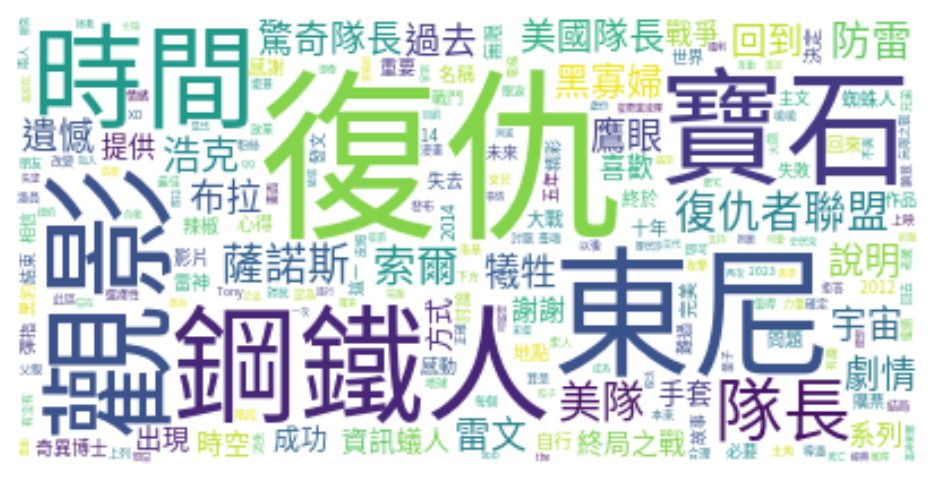

In [33]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

## 記得2019 是漫威第三階段的復仇者聯盟：終局之戰推出的時候, 是當時漫威很出名的電影。 
## 裡面也出現了很多常見的角色比如 索爾, 美國隊長等, 其中最多討論的看起來像是 鋼鐵人(東尼) 以及薩諾斯, 鋼鐵人當時是最後擊敗薩諾斯的英雄,也因此犧牲, 薩諾斯則是第1到第三階段的最終大反派。

## 情緒字分析

In [34]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
213,作品,affect,4948
214,作品,positive,4948
590,反派,affect,4772
591,反派,anger,4772
592,反派,negative,4772
...,...,...,...
2466,煩雜,affect,1
2467,煩雜,anger,1
2468,煩雜,negative,1
2477,熱望,affect,1


In [35]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos

,word,sentiments,size
214,作品,positive,4948
812,喜歡,positive,4209
1661,成功,positive,2535
3569,重要,positive,2323
3747,驚奇,positive,2077
...,...,...,...
723,和煦,positive,1
2602,珍奇,positive,1
3413,贊許,positive,1
1951,整潔,positive,1


In [36]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg

,word,sentiments,size
592,反派,negative,4772
784,問題,negative,3599
1314,復仇,negative,3524
1680,戰爭,negative,1055
1683,戰鬥,negative,1051
...,...,...,...
2451,煩忙,negative,1
2461,煩膩,negative,1
3606,閒話,negative,1
2468,煩雜,negative,1


/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, '負向情緒總數')

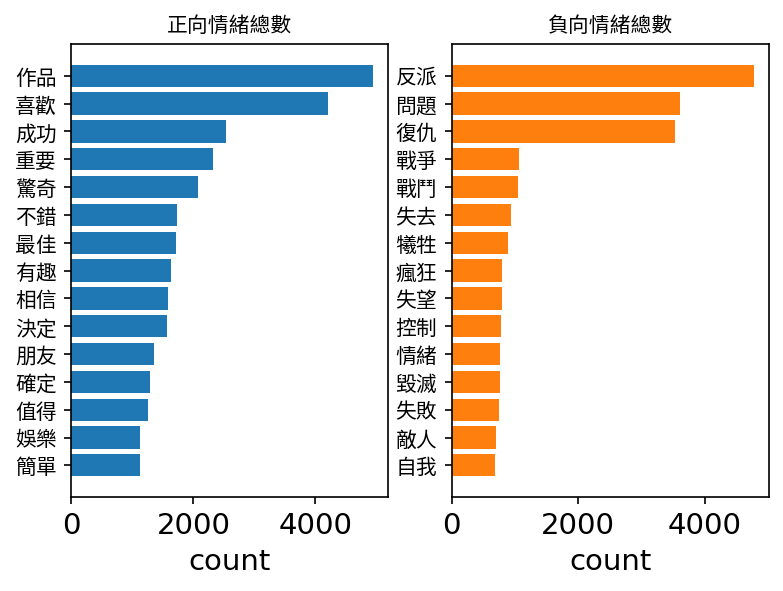

In [37]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

## 負面情緒很多 反派、復仇、戰爭、戰鬥等此言, 都是有關電影的此言,非大家的評論。

## 處理詞彙情緒 (很多都是劇情的詞, 不太像是ptt使用者的評價)

/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


(0.0, 5000.0)

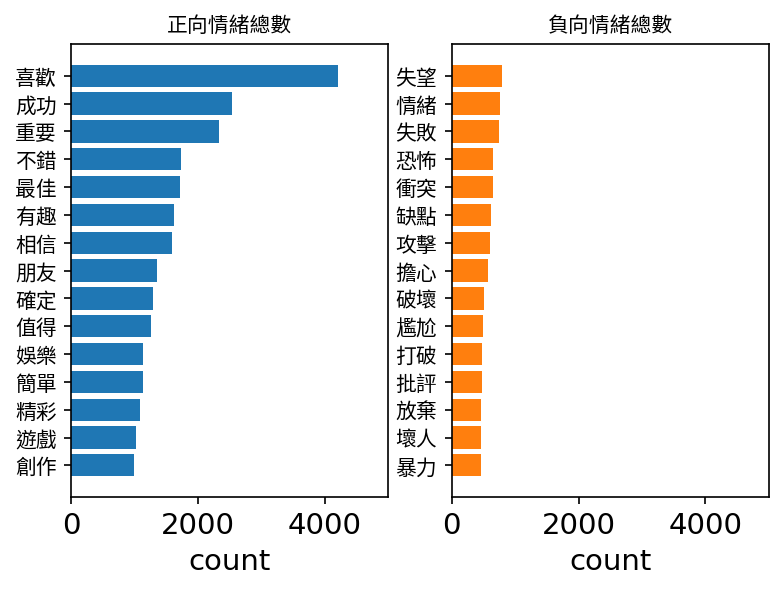

In [38]:
word_count.loc[word_count["word"]=="英雄","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="作品","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="決定","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰爭","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰鬥","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="復仇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="犧牲","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="控制","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="毀滅","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="自我","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="對抗","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="問題","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚奇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="敵人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="死亡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="瘋狂","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="失去","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="邪惡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="惡魔","sentiments"] = np.NaN

##
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

##
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)
ax[0].set_xlim(left=0, right=5000)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)
ax[1].set_xlim(left=0, right=5000)

## 可以看到大家對於復仇者聯盟:終局之戰這部電影的評價是非常好的

## 來看看大眾對於漫威最負面的時候為何

In [39]:
mask = sentiment_count['sentiments'] == 'negative'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
10080,2019-04-24,negative,658,0.034712
4359,2016-04-27,negative,634,0.044519
8092,2018-04-26,negative,538,0.041757
10094,2019-04-26,negative,537,0.031299
10087,2019-04-25,negative,521,0.039494


In [40]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
10081,2019-04-24,positive,707,0.037297
10095,2019-04-26,positive,698,0.040683
4360,2016-04-27,positive,542,0.038059
8086,2018-04-25,positive,505,0.036170
8093,2018-04-26,positive,502,0.038963


## 由於終局之戰討論度太高, 所以負面情緒也很多, 所以04-24 同時也是負面情緒最高的一天
## 那就換第二高的 2016-04-27

In [41]:
date = "2016-04-27"
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date));mask
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]];ptt_df_wc
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

[('美國隊長', 164),
 ('反派', 123),
 ('蜘蛛人', 96),
 ('隊長', 96),
 ('鋼鐵人', 89),
 ('復仇', 87),
 ('喜歡', 80),
 ('東尼', 73),
 ('復仇者聯盟', 66),
 ('作品', 60),
 ('註冊', 57),
 ('蟻人', 55),
 ('劇情', 52),
 ('戰鬥', 51),
 ('問題', 48),
 ('戰爭', 48),
 ('衝突', 48),
 ('巴奇', 47),
 ('冬兵', 46),
 ('政府', 44)]

(-0.5, 399.5, 199.5, -0.5)

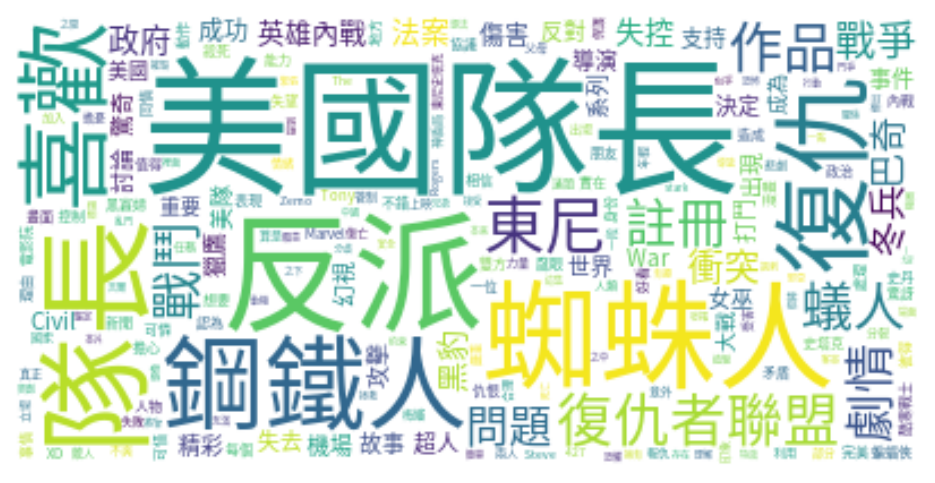

In [42]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

### 這段時間是美國隊長3:英雄內戰 推出的時候, 可以看到其中兩大主要角色 美國隊長鋼鐵人, 當時好處於對立的狀態
### 當時的新角色蜘蛛人也有出現在文字雲上, 也是當時造成轟動的一名英雄

/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator


(0.0, 5000.0)

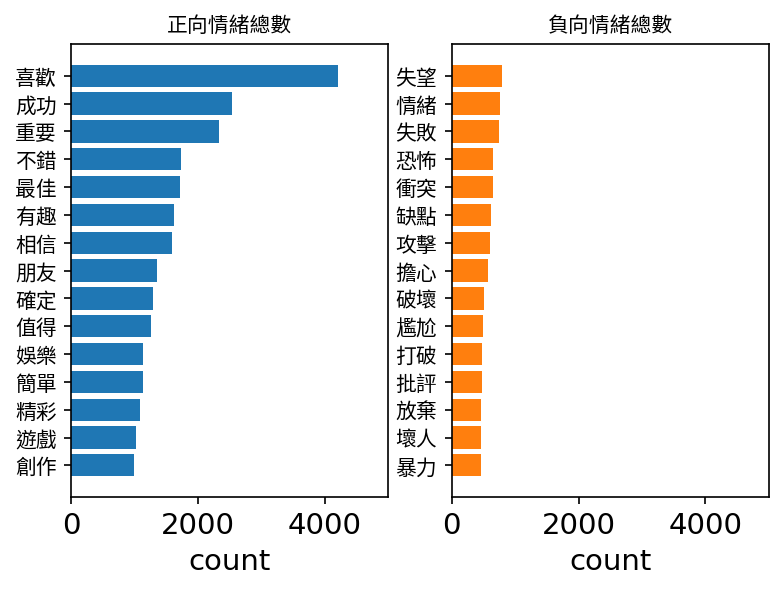

In [43]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

word_count.loc[word_count["word"]=="英雄","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="作品","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="決定","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰爭","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰鬥","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="復仇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="犧牲","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="控制","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="毀滅","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="自我","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="對抗","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="問題","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚奇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="敵人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="死亡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="瘋狂","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="失去","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="邪惡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="惡魔","sentiments"] = np.NaN

##
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

##
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)
ax[0].set_xlim(left=0, right=5000)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)
ax[1].set_xlim(left=0, right=5000)

## 

## 聽說漫威第四階段開始的電影都沒以前的好,所以篩選第四階段以後的日期, 看看大家對於第四階段的評論如何 (約為2020開始)

In [44]:
phase4 = ptt_df.copy()
mask = phase4['artDate'] > pd.to_datetime("2020-01-01")

In [45]:
phase4 = phase4.loc[mask]
phase4.head()

,artTitle,artDate,artComment,insertedDate,,word
383872,[新聞]湯姆霍蘭德被爆加入《猛毒2》 新卡司釋,2020-01-02,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""CavendishJr""...",2020-01-02 02:06:04,湯姆霍蘭德被爆加入《猛毒》 新卡司釋出。「蜘蛛人」湯姆霍蘭德（Tom Holland）有望加...,湯姆
383872,[新聞]湯姆霍蘭德被爆加入《猛毒2》 新卡司釋,2020-01-02,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""CavendishJr""...",2020-01-02 02:06:04,湯姆霍蘭德被爆加入《猛毒》 新卡司釋出。「蜘蛛人」湯姆霍蘭德（Tom Holland）有望加...,霍蘭德
383872,[新聞]湯姆霍蘭德被爆加入《猛毒2》 新卡司釋,2020-01-02,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""CavendishJr""...",2020-01-02 02:06:04,湯姆霍蘭德被爆加入《猛毒》 新卡司釋出。「蜘蛛人」湯姆霍蘭德（Tom Holland）有望加...,加入
383872,[新聞]湯姆霍蘭德被爆加入《猛毒2》 新卡司釋,2020-01-02,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""CavendishJr""...",2020-01-02 02:06:04,湯姆霍蘭德被爆加入《猛毒》 新卡司釋出。「蜘蛛人」湯姆霍蘭德（Tom Holland）有望加...,猛毒
383872,[新聞]湯姆霍蘭德被爆加入《猛毒2》 新卡司釋,2020-01-02,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""CavendishJr""...",2020-01-02 02:06:04,湯姆霍蘭德被爆加入《猛毒》 新卡司釋出。「蜘蛛人」湯姆霍蘭德（Tom Holland）有望加...,卡司


In [46]:
phase4_liwc = pd.merge(phase4[["artDate", "word"]], liwc_dict, how="left")
phase4_liwc

,artDate,word,sentiments
0,2020-01-02,湯姆,NaN
1,2020-01-02,霍蘭德,NaN
2,2020-01-02,加入,NaN
3,2020-01-02,猛毒,NaN
4,2020-01-02,卡司,NaN
...,...,...,...
724239,2022-12-30,台灣,NaN
724240,2022-12-30,在地人,NaN
724241,2022-12-30,建議,NaN
724242,2022-12-30,台灣,NaN


In [47]:
sentiment_count = pd.DataFrame(
    phase4_liwc.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2020-01-02,affect,20
1,2020-01-02,anger,4
2,2020-01-02,anx,3
3,2020-01-02,negative,9
4,2020-01-02,positive,10
...,...,...,...
5955,2022-12-30,negative,15
5957,2022-12-30,sad,4
5953,2022-12-30,affect,45
5954,2022-12-30,anger,7


In [48]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
0,2020-01-02,affect,20,0.065359
1,2020-01-02,anger,4,0.013072
2,2020-01-02,anx,3,0.009804
3,2020-01-02,negative,9,0.029412
4,2020-01-02,positive,10,0.032680
...,...,...,...,...
5955,2022-12-30,negative,15,0.024876
5957,2022-12-30,sad,4,0.006633
5953,2022-12-30,affect,45,0.074627
5954,2022-12-30,anger,7,0.011609


Text(0.5, 1.0, '正負情緒比例折線圖')

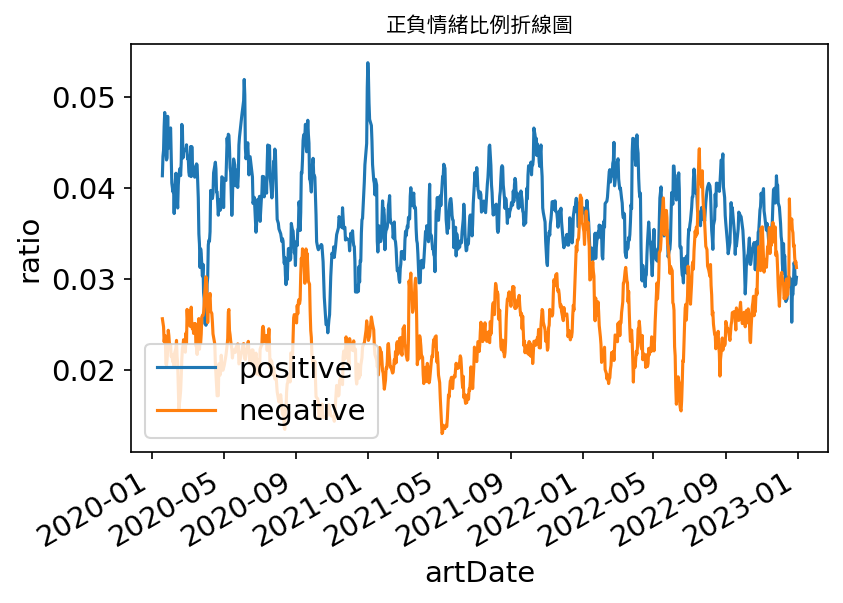

In [49]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

## 雖然一直傳說第四階段後的電影都不好, 但以台灣市場看起來,大家還是非常滿意的。
## 比較值得注意的是2022那段期間,負面情緒有飆升。

In [50]:
mask = sentiment_count['sentiments'] == 'negative'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
4614,2022-05-04,negative,355,0.052290
4621,2022-05-05,negative,248,0.044317
3802,2021-12-16,negative,242,0.040968
3174,2021-09-03,negative,232,0.034570
3562,2021-11-04,negative,222,0.034312


In [51]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
4395,2022-03-26,positive,291,0.122681
3563,2021-11-04,positive,289,0.044668
3598,2021-11-09,positive,253,0.039091
3803,2021-12-16,positive,227,0.038429
3175,2021-09-03,positive,207,0.030845


## 來看看這個階段負面情緒最高的時候為何

## 可以看到最高的負面情緒是2022-05-04

In [52]:
date = "2022-05-04"
mask = (phase4_liwc['artDate'] == pd.Timestamp(date))
ptt_df_wc = phase4_liwc.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

[('宇宙', 127),
 ('奇異', 110),
 ('奇異博士', 107),
 ('汪達', 81),
 ('女巫', 61),
 ('尷尬', 42),
 ('光照', 40),
 ('劇情', 40),
 ('驚悚', 33),
 ('問題', 30),
 ('影集', 30),
 ('戰鬥', 30),
 ('出現', 29),
 ('世界', 28),
 ('喜歡', 26),
 ('美國', 26),
 ('黑暗', 25),
 ('失望', 24),
 ('控制', 24),
 ('教授', 24)]

(-0.5, 399.5, 199.5, -0.5)

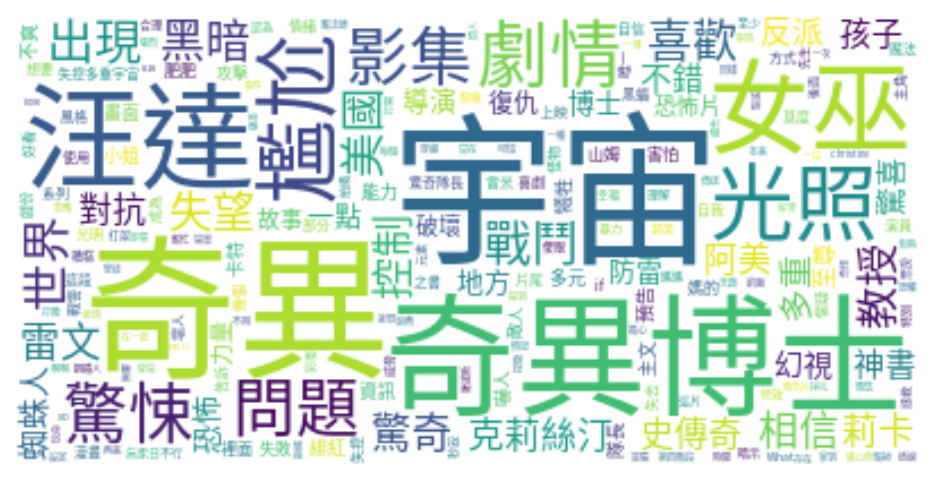

In [53]:
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

## 從文字雲上可以看到奇異博士, 汪達等詞, 當時應該是奇異博士:瘋狂多重宇宙推出的時期, 可以從負面分數推測大家對於這部電影沒有那麼喜歡。

/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator


(0.0, 5000.0)

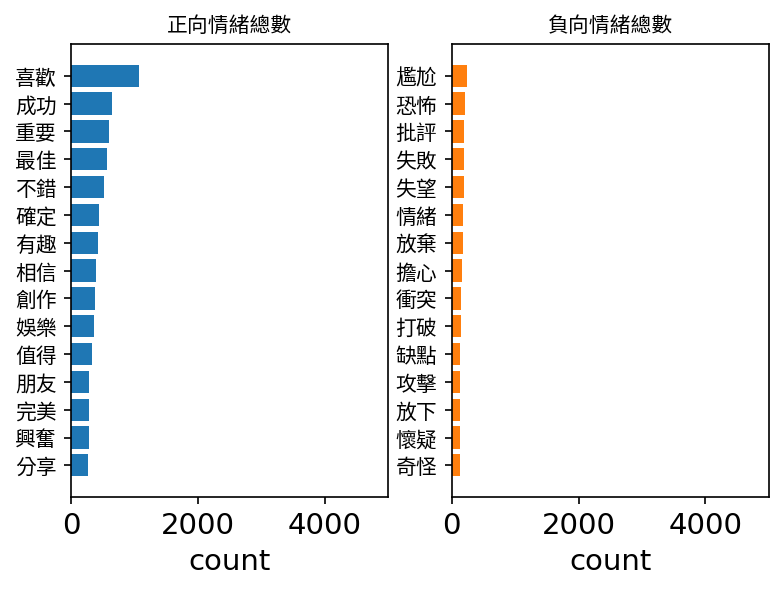

In [54]:
word_count = phase4_liwc.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

word_count.loc[word_count["word"]=="英雄","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="作品","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="決定","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰爭","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="戰鬥","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="反派","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="復仇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="犧牲","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="控制","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="毀滅","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="自我","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="對抗","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="問題","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚奇","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="敵人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="死亡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="瘋狂","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="失去","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="驚人","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="邪惡","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="惡魔","sentiments"] = np.NaN
word_count.loc[word_count["word"]=="奇異","sentiments"] = np.NaN


##
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]

##
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)
ax[0].set_xlim(left=0, right=5000)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)
ax[1].set_xlim(left=0, right=5000)

(-0.5, 399.5, 199.5, -0.5)

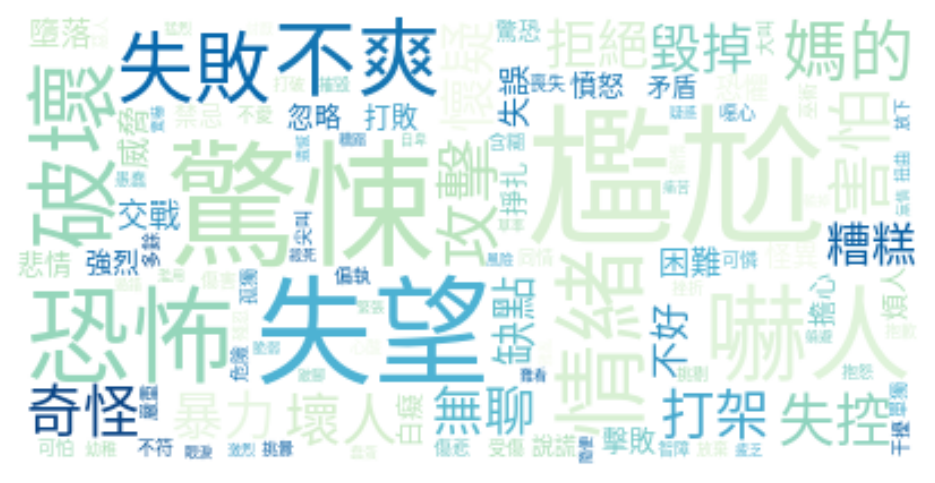

In [55]:
date = "2022-05-04"

phase4_liwc.loc[phase4_liwc["word"]=="英雄","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="反派","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="作品","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="決定","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="戰爭","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="戰鬥","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="反派","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="復仇","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="犧牲","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="控制","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="毀滅","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="自我","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="對抗","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="問題","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="驚奇","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="敵人","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="死亡","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="瘋狂","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="失去","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="驚人","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="邪惡","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="惡魔","sentiments"] = np.NaN
phase4_liwc.loc[phase4_liwc["word"]=="奇異","sentiments"] = np.NaN

mask = (phase4_liwc['artDate'] == pd.Timestamp(date)) & (phase4_liwc["sentiments"] == "negative")
ptt_df_wc = phase4_liwc.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

## 可以看見大眾視乎對於這部電影期望蠻高的, 所以有出現失望、失敗等此言

## 主要角色評分

In [64]:
character = ["鋼鐵人","美國隊長","戰爭機器","幻視","美國隊長","雷神","史蒂夫羅傑","索爾"
             ,"娜塔莎","黑寡婦","鷹眼","浩克","布魯斯","克林特","獵鷹","緋紅女巫","旺達"
             ,"快銀","皮特羅","尼克福瑞","尼克","蟻人","菲爾考森","菲爾","賈維斯","彼得帕克"
             ,"蜘蛛人","珍佛斯特","洛基","巴奇","薩諾斯","山姆","德克斯","葛摩菈"
             ,"格魯特","涅布拉","彼得奎爾","星爵","火箭","史考特朗恩","黃蜂女","珍妮特"
            ,"珍妮特汎戴茵","海姆達爾","黑豹","螳螂女","舒莉","卡蘿丹佛斯","驚奇隊長"
            ,"格魯特","尚氣","彼得帕克","查爾斯賽維爾","汪達","緋紅女巫"]

character_count = ptt_liwc_df[ptt_liwc_df['word'].isin(character)].groupby(['word'], as_index=False).size()
character_count = character_count.melt('word')

In [67]:
plt.rcParams['font.sans-serif'] = ['KaiTi']

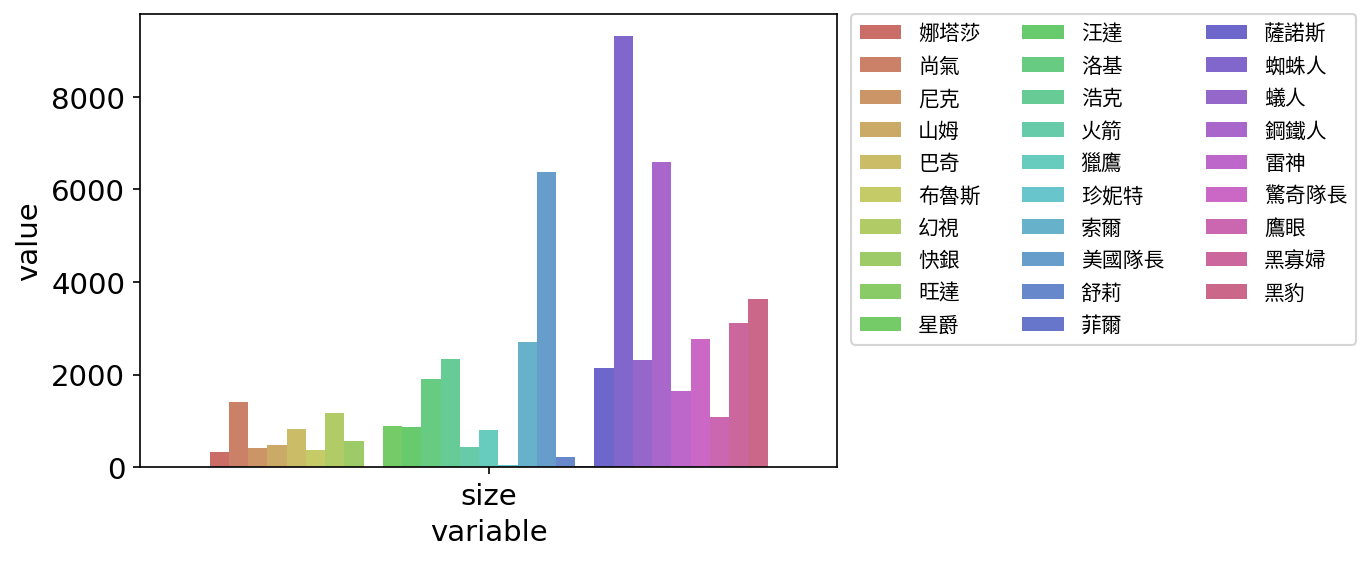

In [72]:
ax = sns.barplot(data=character_count, x='variable', y='value', hue='word', palette=sns.color_palette("hls",30))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=3, prop=fprop)


## 前三名角色討論度情緒分析

In [58]:
ptt_liwc_df

,artDate,word,sentiments
0,2008-02-22,劇照,NaN
1,2008-02-22,參照,NaN
2,2008-02-22,任意,NaN
3,2008-02-22,轉載,NaN
4,2008-02-22,記得,NaN
...,...,...,...
2539505,2022-12-30,台灣,NaN
2539506,2022-12-30,在地人,NaN
2539507,2022-12-30,建議,NaN
2539508,2022-12-30,台灣,NaN


In [59]:
character = ["鋼鐵人","美國隊長","戰爭機器","幻視","美國隊長","雷神","史蒂夫羅傑","索爾"
             ,"娜塔莎","黑寡婦","鷹眼","浩克","布魯斯","克林特","獵鷹","緋紅女巫","旺達"
             ,"快銀","皮特羅","尼克福瑞","尼克","蟻人","菲爾考森","菲爾","賈維斯","彼得帕克"
             ,"蜘蛛人","珍佛斯特","洛基","巴奇","薩諾斯","山姆","德克斯","葛摩菈"
             ,"格魯特","涅布拉","彼得奎爾","星爵","火箭","史考特朗恩","黃蜂女","珍妮特"
            ,"珍妮特汎戴茵","海姆達爾","黑豹","螳螂女","舒莉","卡蘿丹佛斯","驚奇隊長"
            ,"格魯特","尚氣","彼得帕克","查爾斯賽維爾","汪達","緋紅女巫"]

character_count = ptt_liwc_df[ptt_liwc_df['word'].isin(character)].groupby(['word'], as_index=False).size()
characters = character_count.sort_values(by=["size"],ascending=False).head(3)
characters

,word,size
21,蜘蛛人,9321
23,鋼鐵人,6581
17,美國隊長,6372


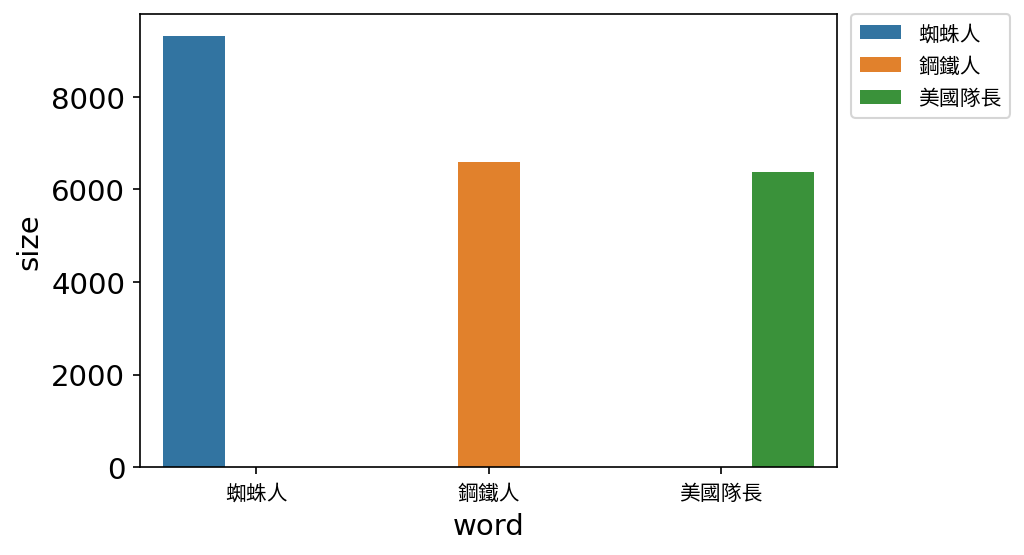

In [82]:
ax = sns.barplot(data=characters, x='word', y='size', hue='word')
ax.set_xticklabels(characters["word"], fontproperties=fprop)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop=fprop)

In [61]:
spiderman = ptt_liwc_df[ptt_liwc_df['word'].isin(["蜘蛛人"])]
ironman = ptt_liwc_df[ptt_liwc_df['word'].isin(["鋼鐵人"])]
captain = ptt_liwc_df[ptt_liwc_df['word'].isin(["美國隊長"])]

## 蜘蛛人

In [62]:
dates = spiderman['artDate'].unique()
spiderman = ptt_liwc_df.loc[ptt_liwc_df['artDate'].isin(dates)]
spiderman

,artDate,word,sentiments
954,2008-05-03,補充,NaN
955,2008-05-03,好了,NaN
956,2008-05-03,寫給,NaN
957,2008-05-03,美漫,NaN
958,2008-05-03,概念,NaN
...,...,...,...
2539505,2022-12-30,台灣,NaN
2539506,2022-12-30,在地人,NaN
2539507,2022-12-30,建議,NaN
2539508,2022-12-30,台灣,NaN


In [83]:
sentiment_count = pd.DataFrame(
    spiderman.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2008-05-03,affect,13
1,2008-05-03,anger,3
2,2008-05-03,anx,1
3,2008-05-03,negative,4
4,2008-05-03,positive,8
...,...,...,...
8031,2022-12-30,negative,15
8033,2022-12-30,sad,4
8029,2022-12-30,affect,45
8030,2022-12-30,anger,7


## 正負向情緒分數聲量折線圖

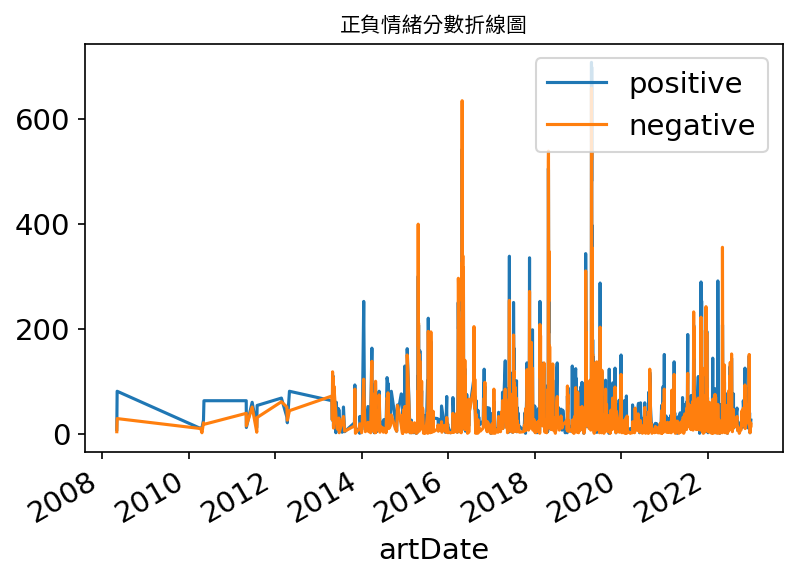

In [85]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

## 正負向情緒分數比例折線圖

Text(0.5, 1.0, '正負情緒比例折線圖')

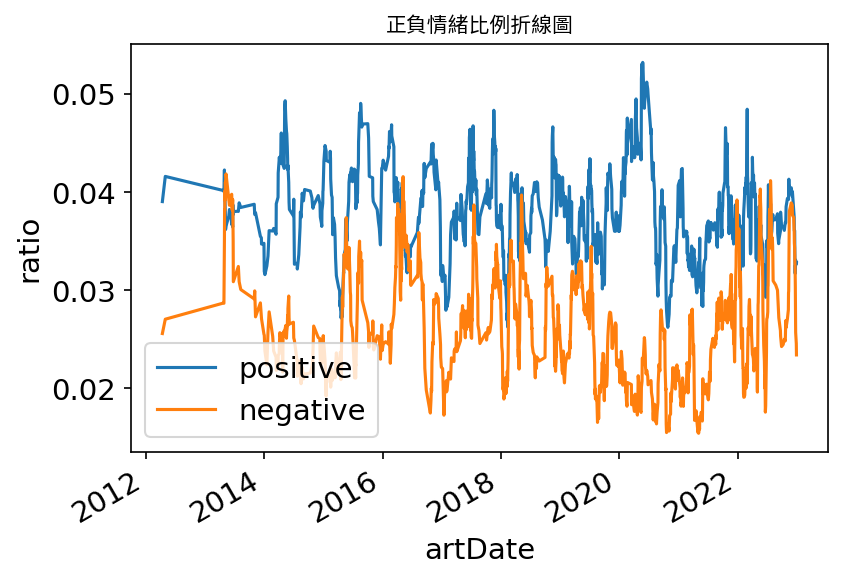

In [86]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

## 看起來蜘蛛人剛出現的時候, 負面的情緒稍微比較高, 但後來的聲量看起來都偏正面的回應

## 鋼鐵人

In [88]:
dates = ironman['artDate'].unique()
ironman = ptt_liwc_df.loc[ptt_liwc_df['artDate'].isin(dates)]
ironman

,artDate,word,sentiments
954,2008-05-03,補充,NaN
955,2008-05-03,好了,NaN
956,2008-05-03,寫給,NaN
957,2008-05-03,美漫,NaN
958,2008-05-03,概念,NaN
...,...,...,...
2538902,2022-12-29,瘋狂,affect
2538903,2022-12-29,瘋狂,negative
2538904,2022-12-29,曉得,NaN
2538905,2022-12-29,續集,NaN


In [92]:
sentiment_count = pd.DataFrame(
    ironman.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2008-05-03,affect,13
1,2008-05-03,anger,3
2,2008-05-03,anx,1
3,2008-05-03,negative,4
4,2008-05-03,positive,8
...,...,...,...
8309,2022-12-29,anger,7
8310,2022-12-29,anx,4
8311,2022-12-29,negative,21
8312,2022-12-29,positive,25


## 正負向情緒分數聲量折線圖

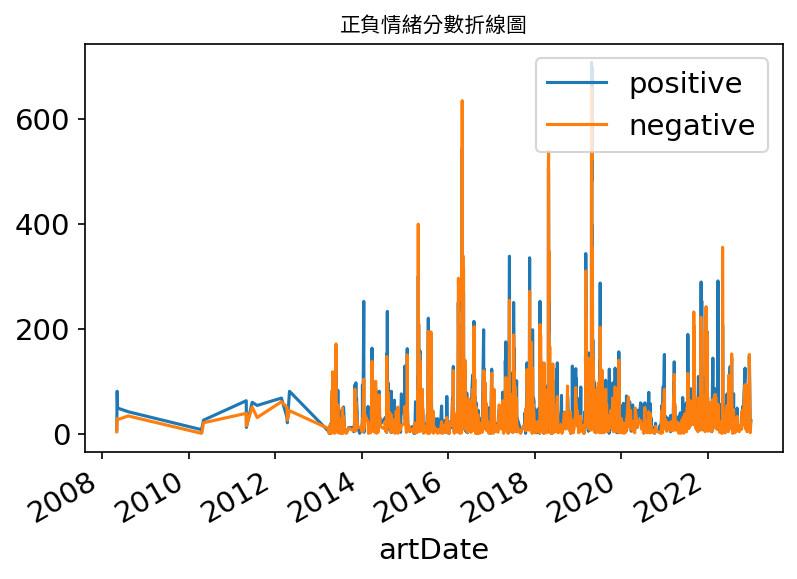

In [93]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

## 正負向情緒分數比例折線圖

Text(0.5, 1.0, '正負情緒比例折線圖')

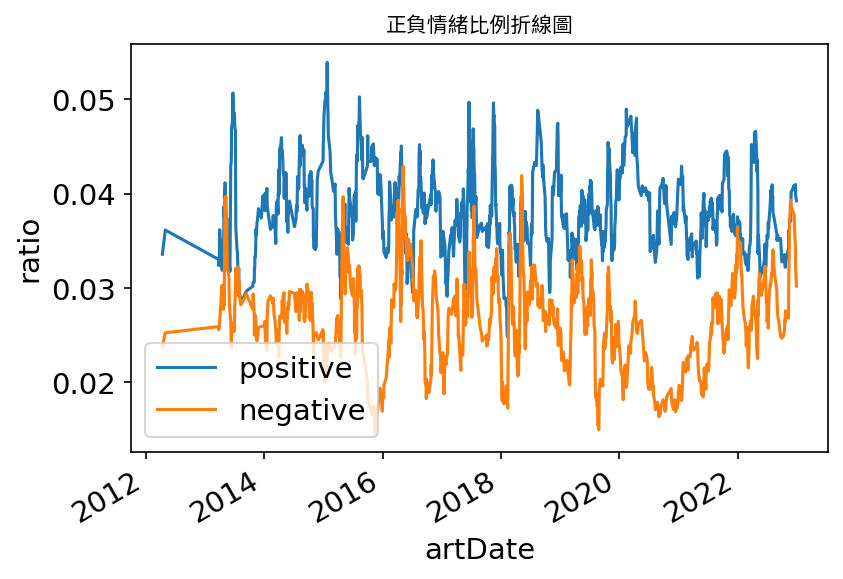

In [94]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

## 可以看到鋼鐵人的情緒比例, 大致上還是正面比較多, 也跟蜘蛛人一樣前面負面情緒有稍微高一點。
## 還有中間2018的部分, 有比正面情緒多, 可以推測當時候鋼鐵人的犧牲,可能讓許多觀眾產生負面的情緒。

## 美國隊長

In [95]:
dates = captain['artDate'].unique()
captain = ptt_liwc_df.loc[ptt_liwc_df['artDate'].isin(dates)]
captain

,artDate,word,sentiments
954,2008-05-03,補充,NaN
955,2008-05-03,好了,NaN
956,2008-05-03,寫給,NaN
957,2008-05-03,美漫,NaN
958,2008-05-03,概念,NaN
...,...,...,...
2538137,2022-12-28,死侍,NaN
2538138,2022-12-28,將於,NaN
2538139,2022-12-28,2024,NaN
2538140,2022-12-28,11,NaN


In [96]:
sentiment_count = pd.DataFrame(
    captain.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2008-05-03,affect,13
1,2008-05-03,anger,3
2,2008-05-03,anx,1
3,2008-05-03,negative,4
4,2008-05-03,positive,8
...,...,...,...
7949,2022-12-28,sad,1
7945,2022-12-28,anger,2
7944,2022-12-28,affect,14
7946,2022-12-28,anx,1


## 正負向情緒分數聲量折線圖

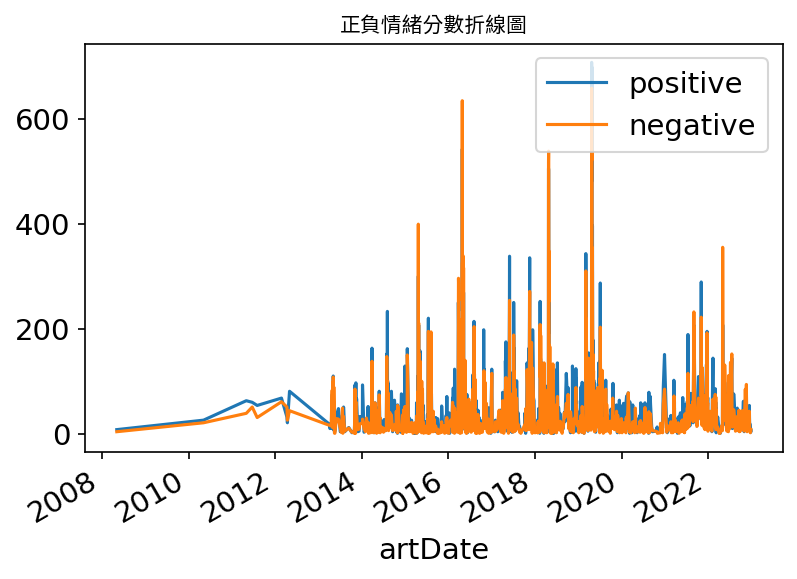

In [97]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

## 正負向情緒分數比例折線圖

Text(0.5, 1.0, '正負情緒比例折線圖')

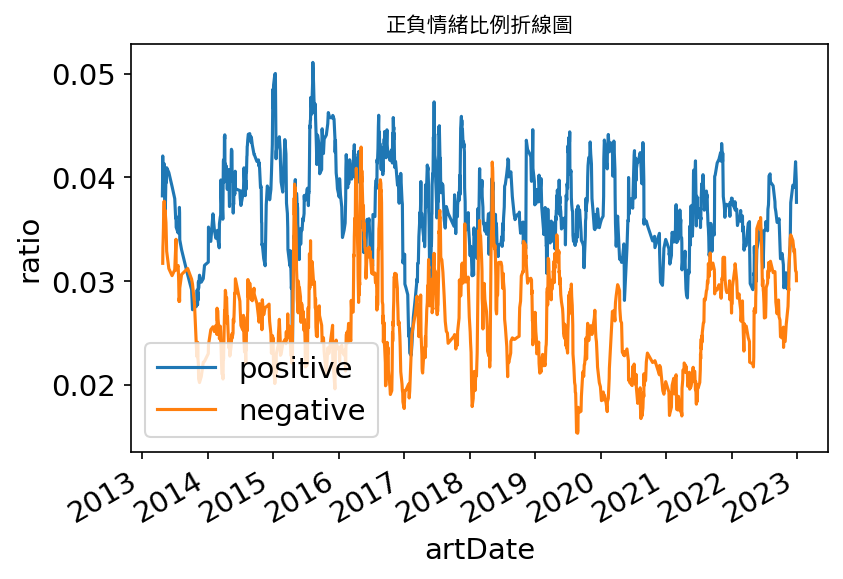

In [98]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

### 從上面可以看到, 大眾對於美國隊長的情緒也是偏正面, 但2016附近負面情緒有飆高, 有可能當時復仇者聯盟:無限之戰裡美國隊長的表象讓大家不太滿意。 